<h1 style="color:violet;">Analysing a Dataset of LEGO Pieces</h1>

<p style="color:smokewhite; font-size:20px">LEGO is a well-known brand of construction toys that allows users to build a wide variety of structures, vehicles, and creations using interlocking plastic bricks. LEGO sets come in various themes, including city, space, castle, pirates, superheroes, and more. These toys are popular among children and adults alike for their versatility, creativity, and educational value</p>

<img src="./assets/bricks.jpg" alt="Lego Bricks">

<h2 style="color:violet;"><em>Questions to Answer</em></h2>

<ol style="color:smokewhite; font-size:20px;">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?</li>

<li>When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?</li>
</ol>

<h3 style="color:violet;"><em>Loading the needed packages</em></h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3 style="color:violet;"><em>Loading the colors dataset</em></h3>

In [2]:
# loading the colors data set
color_df = pd.read_csv("./Data/colors.csv")

<h3 style="color:violet;"><em>Viewing the top 5 rows of the dataset</em></h3>

In [4]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


<h4 style="color:smokewhite;">How many different lego colors does the company makes?</h4>

In [5]:
color_df["name"].nunique()

135

<h4 style="color:smokewhite;">How many are transparent vs Opaque?</h4>

In [6]:
color_df["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

<p style="Color:violet;, font-size=15">Where: <br/>
f : False  <strong>(Opaque) </strong><br/>
t : True  <strong>(transperant)</strong>
</p>

<h3 style="color:violet;"><em>Understanding Lego Theme VS Lego Set</em></h3>

<h4 style="color:smokewhite;">Themes</h4>

<img src="./assets/lego_themes.png" alt="lego theme">

<h4 style="color:smokewhite;">Sets</h4>

<img src="./assets/lego_sets.png" alt="lego set">

<h3 style="color:violet;"><em>Loading the sets dataset</em></h3>

In [7]:
sets_df = pd.read_csv("./Data/sets.csv")

<h3 style="color:violet;"><em>Viewing the top 5 rows of the dataset</em></h3>

In [9]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


<h4 style="color:smokewhite;">In which year was the first LEGO sets released and what was the name of the set</h4>

In [14]:
sets_df.sort_values("year")

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


<p style="color:violet; font-size:15;"><em>The First sets was released in the year <strong>1949</strong> The name was <strong>(ABB)</strong></em></p>

<h4 style="color:smokewhite;">How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?</h4>

In [18]:
sets_df.loc[sets_df["year"]==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


<h4 style="color:smokewhite;">What are the top 5 LEGO sets with the most number of parts?</h4>

In [21]:
sets_df.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


<h4 style="color:smokewhite;">Number of sets produce year on year</h4>

In [23]:
sets_by_year = sets_df.groupby("year")["name"].count()
sets_by_year.head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: name, dtype: int64

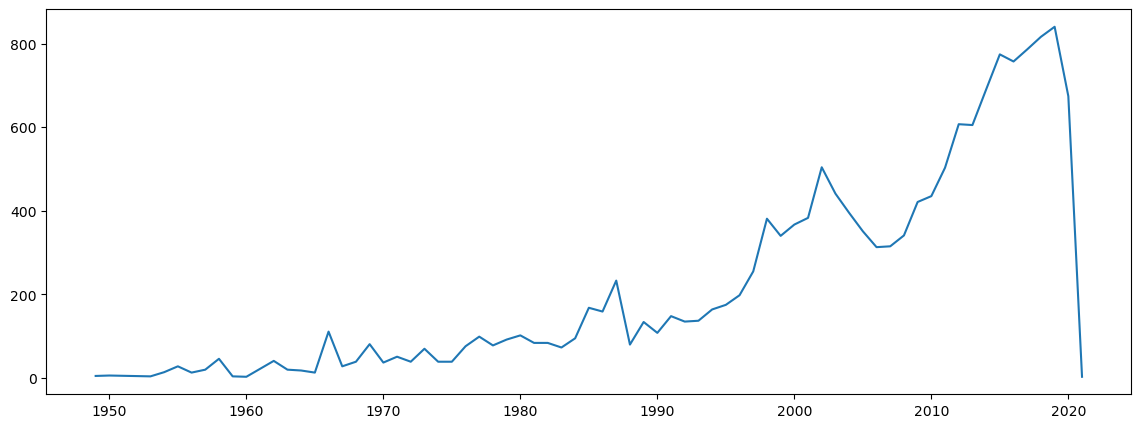

In [25]:
plt.figure(figsize=(14, 5))
plt.plot(sets_by_year.index, sets_by_year)

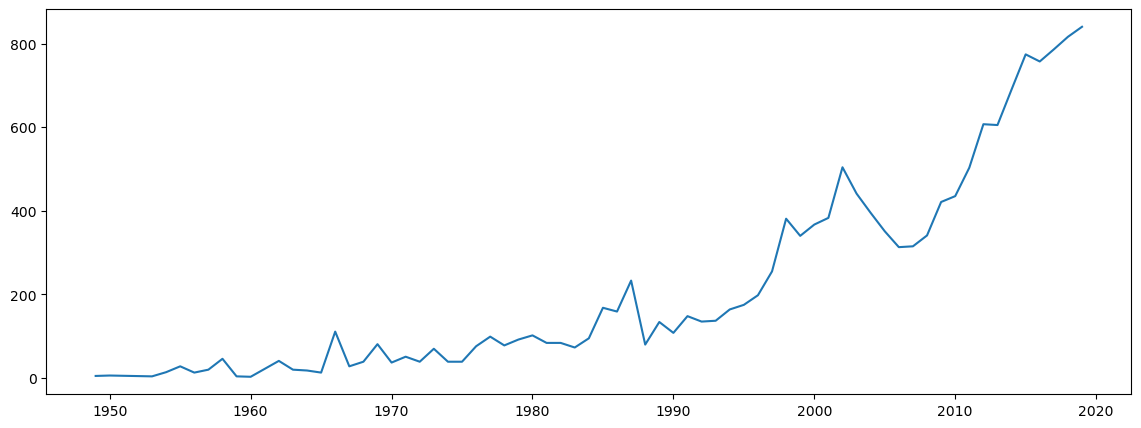

In [26]:
plt.figure(figsize=(14, 5))
plt.plot(sets_by_year.index[:-2], sets_by_year[:-2])

<h4 style="color:smokewhite;">Number of unique theme per calendar year</h4>

In [28]:
themes_year_on_year = sets_df.groupby("year").agg({"theme_id":pd.Series.nunique})

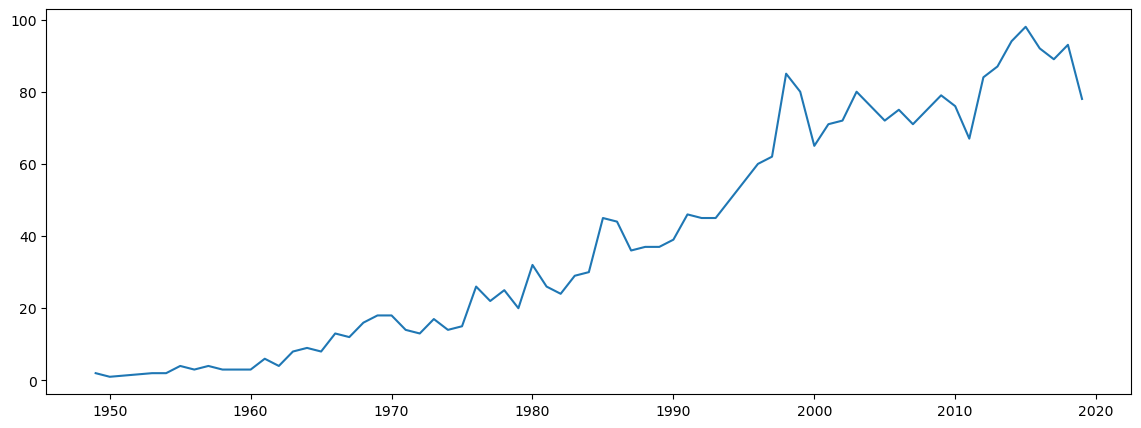

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(themes_year_on_year.index[:-2], themes_year_on_year[:-2])


Text(0.5, 0, 'Years')

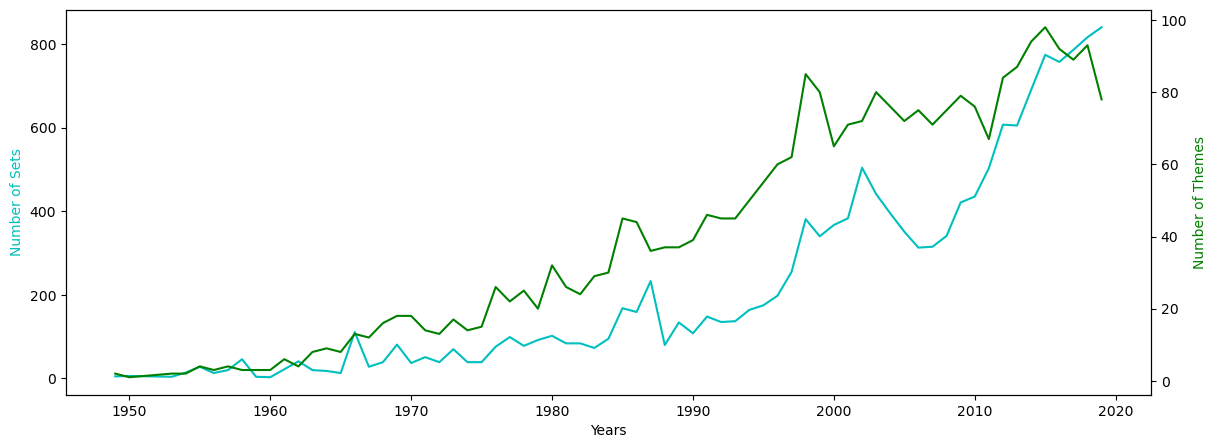

In [46]:
plt.figure(figsize=(14, 5))
ax1 = plt.gca()
ax2= ax1.twinx()
ax1.plot(sets_by_year.index[:-2], sets_by_year[:-2], 'c')
ax2.plot(themes_year_on_year.index[:-2], themes_year_on_year[:-2], 'g')
ax1.set_ylabel("Number of Sets", color='c')
ax2.set_ylabel("Number of Themes", color='g')
ax1.set_xlabel("Years")

<h4 style="color:smokewhite;">Average Number of parts per year</h4>

In [49]:
parts_per_sets = sets_df.groupby("year").agg({"num_parts":"mean"})

In [50]:
parts_per_sets

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


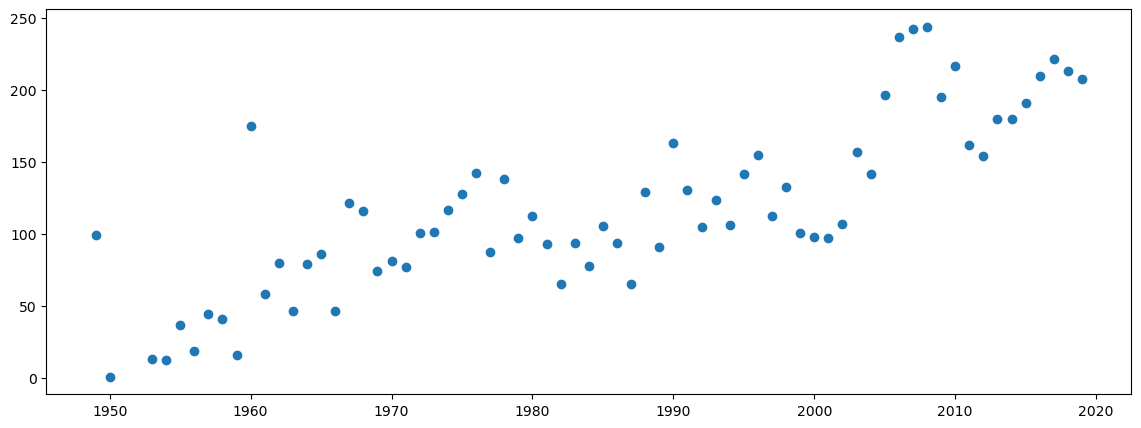

In [56]:
plt.figure(figsize=(14, 5))
plt.scatter(parts_per_sets.index[:-2], parts_per_sets[:-2])

<h3 style="color:violet;"><em>Merging the data sets with knowledge of relational databases</em></h3>

<img src="./assets/rebrickable_schema.png" alt="schema">

In [58]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64

In [59]:
set_theme_count_df = pd.DataFrame({
    "id":set_theme_count.index,
    "set_count":set_theme_count
})

In [61]:
set_theme_count_df

,id,set_count
theme_id,,
158,158,753
501,501,656
494,494,398
435,435,356
503,503,329
...,...,...
307,307,1
215,215,1
361,361,1


In [62]:
themes_df = pd.read_csv("./data/themes.csv")

In [63]:
merged_df = pd.merge(set_theme_count_df, themes_df, on="id" )

In [64]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


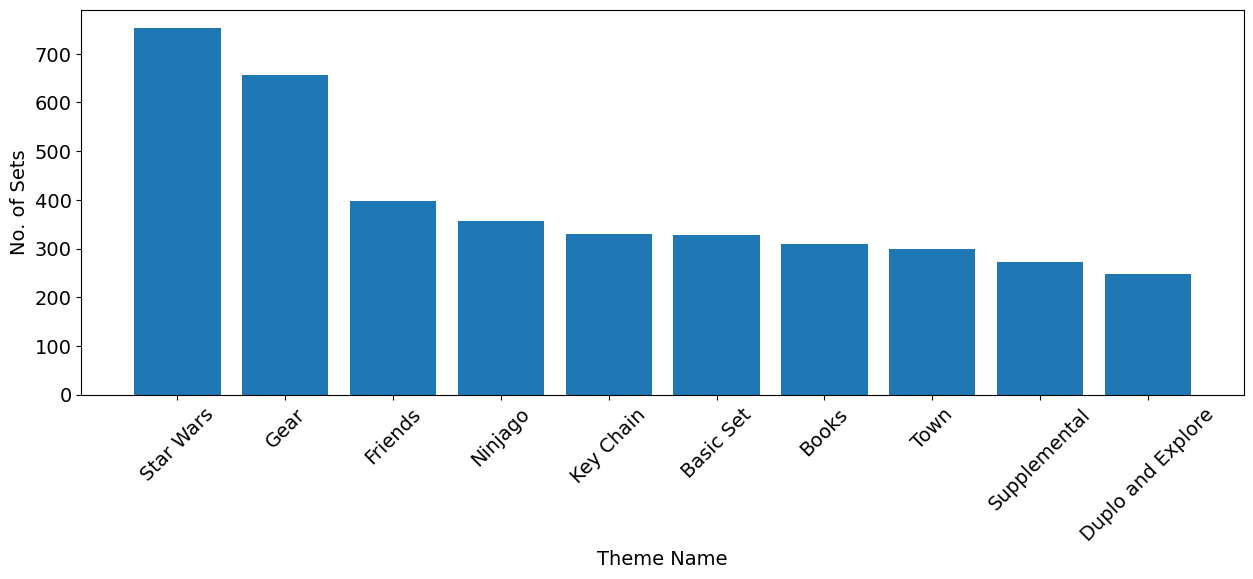

In [71]:
plt.figure(figsize=(15, 5))
plt.bar(merged_df["name"].head(10), merged_df["set_count"].head(10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("No. of Sets", fontsize=14)
plt.xlabel("Theme Name", fontsize=14);